# Redes Neuronales Artificiales

## Aplicación a datos de reconocimiento de actividad humana con smartphones

https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

## Librerías

In [2]:
install.packages('tensorflow')
install.packages('tfestimators')
install.packages('keras')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rappdirs’, ‘config’, ‘reticulate’, ‘tfruns’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘forge’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zeallot’




In [0]:
library(dplyr)
library(tidyverse)
library(tensorflow)
library(tfestimators)
library(keras)

## Datos de entrenamiento, validación y test

Para poder levantar los datos, ir al icono de carpeta a la izquierda y subir los archivos *train.csv* y *test.csv*.

In [5]:
train_df <- read_csv('train.csv')

Warning message:
“Duplicated column names deduplicated: 'fBodyAcc-bandsEnergy()-1,8' => 'fBodyAcc-bandsEnergy()-1,8_1' [317], 'fBodyAcc-bandsEnergy()-9,16' => 'fBodyAcc-bandsEnergy()-9,16_1' [318], 'fBodyAcc-bandsEnergy()-17,24' => 'fBodyAcc-bandsEnergy()-17,24_1' [319], 'fBodyAcc-bandsEnergy()-25,32' => 'fBodyAcc-bandsEnergy()-25,32_1' [320], 'fBodyAcc-bandsEnergy()-33,40' => 'fBodyAcc-bandsEnergy()-33,40_1' [321], 'fBodyAcc-bandsEnergy()-41,48' => 'fBodyAcc-bandsEnergy()-41,48_1' [322], 'fBodyAcc-bandsEnergy()-49,56' => 'fBodyAcc-bandsEnergy()-49,56_1' [323], 'fBodyAcc-bandsEnergy()-57,64' => 'fBodyAcc-bandsEnergy()-57,64_1' [324], 'fBodyAcc-bandsEnergy()-1,16' => 'fBodyAcc-bandsEnergy()-1,16_1' [325], 'fBodyAcc-bandsEnergy()-17,32' => 'fBodyAcc-bandsEnergy()-17,32_1' [326], 'fBodyAcc-bandsEnergy()-33,48' => 'fBodyAcc-bandsEnergy()-33,48_1' [327], 'fBodyAcc-bandsEnergy()-49,64' => 'fBodyAcc-bandsEnergy()-49,64_1' [328], 'fBodyAcc-bandsEnergy()-1,24' => 'fBodyAcc-bandsEnergy()-1,24_1'

In [6]:
tail(variable.names(train_df))

[1] "angle(tBodyGyroJerkMean,gravityMean)"
[2] "angle(X,gravityMean)"                
[3] "angle(Y,gravityMean)"                
[4] "angle(Z,gravityMean)"                
[5] "subject"                             
[6] "Activity"

In [7]:
unique(train_df$Activity)

[1] "STANDING"           "SITTING"            "LAYING"            
[4] "WALKING"            "WALKING_DOWNSTAIRS" "WALKING_UPSTAIRS"

In [8]:
length(unique(train_df$subject))

[1] 21

In [0]:
set.seed(123)

subject_cv <- sample(unique(train_df$subject), 9)

cv_df <- train_df %>%
filter(subject %in% subject_cv)

train_df <- train_df %>%
filter(subject %in% subject_cv == F)

In [10]:
length(unique(cv_df$subject))

[1] 9

In [11]:
length(unique(train_df$subject))

[1] 12

In [12]:
test_df <- read_csv('test.csv')
tail(variable.names(test_df))

Warning message:
“Duplicated column names deduplicated: 'fBodyAcc-bandsEnergy()-1,8' => 'fBodyAcc-bandsEnergy()-1,8_1' [317], 'fBodyAcc-bandsEnergy()-9,16' => 'fBodyAcc-bandsEnergy()-9,16_1' [318], 'fBodyAcc-bandsEnergy()-17,24' => 'fBodyAcc-bandsEnergy()-17,24_1' [319], 'fBodyAcc-bandsEnergy()-25,32' => 'fBodyAcc-bandsEnergy()-25,32_1' [320], 'fBodyAcc-bandsEnergy()-33,40' => 'fBodyAcc-bandsEnergy()-33,40_1' [321], 'fBodyAcc-bandsEnergy()-41,48' => 'fBodyAcc-bandsEnergy()-41,48_1' [322], 'fBodyAcc-bandsEnergy()-49,56' => 'fBodyAcc-bandsEnergy()-49,56_1' [323], 'fBodyAcc-bandsEnergy()-57,64' => 'fBodyAcc-bandsEnergy()-57,64_1' [324], 'fBodyAcc-bandsEnergy()-1,16' => 'fBodyAcc-bandsEnergy()-1,16_1' [325], 'fBodyAcc-bandsEnergy()-17,32' => 'fBodyAcc-bandsEnergy()-17,32_1' [326], 'fBodyAcc-bandsEnergy()-33,48' => 'fBodyAcc-bandsEnergy()-33,48_1' [327], 'fBodyAcc-bandsEnergy()-49,64' => 'fBodyAcc-bandsEnergy()-49,64_1' [328], 'fBodyAcc-bandsEnergy()-1,24' => 'fBodyAcc-bandsEnergy()-1,24_1'

[1] "angle(tBodyGyroJerkMean,gravityMean)"
[2] "angle(X,gravityMean)"                
[3] "angle(Y,gravityMean)"                
[4] "angle(Z,gravityMean)"                
[5] "subject"                             
[6] "Activity"

## Variables objetivo / explicativas

In [0]:
x_train <- train_df %>%
select(-subject, -Activity) %>%
as.matrix()

In [0]:
y_train <- train_df %>%
mutate(T1 = ifelse(Activity == "STANDING", 1, 0),
T2 = ifelse(Activity == "SITTING", 1, 0),
T3 = ifelse(Activity == "LAYING", 1, 0),
T4 = ifelse(Activity == "WALKING", 1, 0),
T5 = ifelse(Activity == "WALKING_DOWNSTAIRS", 1, 0),
T6 = ifelse(Activity == "WALKING_UPSTAIRS", 1, 0)) %>%
select(T1:T6) %>%
as.matrix()

In [0]:
x_cv <- cv_df %>%
select(-subject, -Activity) %>%
as.matrix()

In [0]:
y_cv <- cv_df %>%
mutate(T1 = ifelse(Activity == "STANDING", 1, 0),
T2 = ifelse(Activity == "SITTING", 1, 0),
T3 = ifelse(Activity == "LAYING", 1, 0),
T4 = ifelse(Activity == "WALKING", 1, 0),
T5 = ifelse(Activity == "WALKING_DOWNSTAIRS", 1, 0),
T6 = ifelse(Activity == "WALKING_UPSTAIRS", 1, 0)) %>%
select(T1:T6) %>%
as.matrix()

In [0]:
x_test <- test_df %>%
select(-subject, -Activity) %>%
as.matrix()

In [0]:
y_test <- test_df %>%
mutate(T1 = ifelse(Activity == "STANDING", 1, 0),
T2 = ifelse(Activity == "SITTING", 1, 0),
T3 = ifelse(Activity == "LAYING", 1, 0),
T4 = ifelse(Activity == "WALKING", 1, 0),
T5 = ifelse(Activity == "WALKING_DOWNSTAIRS", 1, 0),
T6 = ifelse(Activity == "WALKING_UPSTAIRS", 1, 0)) %>%
select(T1:T6) %>%
as.matrix()

## Uso de TensorFlow

In [19]:
sess = tf$Session()
use_session_with_seed(123)

Set session seed to 123 (disabled GPU, CPU parallelism)



## ¿Cuántas unidades debería tener la capa oculta?

Como hablamos anteriormente, podríamos pensar que tendría que haber un número óptimo de unidades en la capa oculta. Este hiperparámetro, llamémoslo M, se determinará en función al análisis del error que haremos a continuación.

Vamos a estimar el error aparente que tendría la RNA si M fuese 100, 500, 1000 o 5000. Para eso planteamos un proceso en el que, para cada valor de M que queremos probar, usaremos los datos de entrenamiento para estimar los parámetros de la red y luego los datos de validación para observar el error sobre un conjunto que no haya sido utilizado en la etapa de estimación. Esperamos que esto nos de una idea de qué valor de M podría resultar apropiado.

In [0]:
M <- c(100, 500, 1000, 5000)

M_Unid <- c()
Muestra <- c()
Err_aparente <- c()
Iteracion <- c()
Acc_train <- c()
Acc_cv <- c()

prev_time <- Sys.time()

for (i in 1:length(M)) {
  
  for (j in 1:30) {
    
    rna1 <- keras_model_sequential() 
    rna1 %>% 
      layer_dense(units = M[i], 
                  activation = 'relu',
                  input_shape = c(unit_count)) %>% 
      layer_dense(units = 6, 
                  activation = 'softmax')
    
    rna1 %>% compile(
      loss = 'categorical_crossentropy',
      optimizer = optimizer_sgd(lr = 0.01),
      metrics = c('categorical_accuracy')
    )
    
    history1 <- rna1 %>% 
      fit(x = x_train, 
          y = y_train,
          epochs = 5,
          validation_data = list(x_cv,y_cv))
    
    
    
    Iteracion <- c(Iteracion, replicate(2,j))
    
    M_Unid <- c(M_Unid, replicate(2,M[i]))
    
    Muestra <- c(Muestra,
                 "Entrenamiento",
                 "Validación")
    
    Acc_train <- rna1 %>% evaluate(x_train, y_train)
    
    Acc_cv <- rna1 %>% evaluate(x_cv, y_cv)
    
    Err_aparente <- c(Err_aparente,
                      1-Acc_train$categorical_accuracy,
                      1-Acc_cv$categorical_accuracy)
    
  }
}

pos_time <- Sys.time()

In [26]:
pos_time - prev_time

Time difference of 22.77968 mins

In [0]:
selec_M <- data.frame(M_Unid, Muestra, Err_aparente)

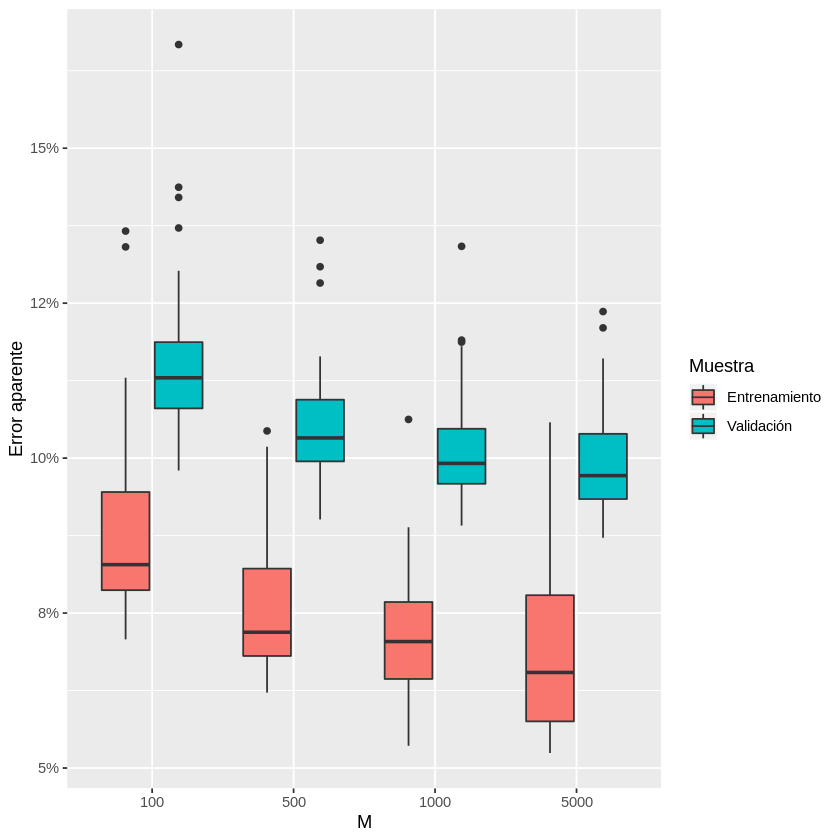

In [28]:
ggplot(data = selec_M,
       aes(x = factor(M_Unid),
           y = Err_aparente,
           fill = Muestra)) +
  geom_boxplot() +
  scale_y_continuous(labels = scales::percent_format(1)) + 
  labs(x = "M",
       y = "Error aparente")

## Otra estrategia

Otra manera de proceder sería eligiendo un valor de M grande (grande sería al menos mayor que la cantidad de unidades en la capa de entrada) y, en la función de costo que utilizamos para la estimación de los parámetros, introducir un parámetro de penalización que fuerce a aquellos parámetros que no tengan mucho sustento en los datos a tener un peso bajo.

Para hacer esto, podemos plantear algunos valores del parámetro de penalización y proceder de la misma manera que cuando probamos distintos valores de M, solamente que ahora tendríamos que fijar M en un valor "grande" y hacer variar la penalización, a la que llamaremos  λ  (en el código está como lambda).

In [0]:
lambda <- c(0, 0.01, 0.1, 1, 10)

Reg_param <- c()
Muestra <- c()
Err_aparente <- c()
Iteracion <- c()
Acc_train <- c()
Acc_cv <- c()

prev_time2 <- Sys.time()

for (i in 1:length(lambda)) {
  
  for (j in 1:30) {
    
    rna1 <- keras_model_sequential() 
    rna1 %>% 
      layer_dense(units = 1000, 
                  activation = 'relu', 
                  kernel_regularizer = regularizer_l2(lambda[i]),
                  input_shape = c(unit_count)) %>% 
      layer_dense(units = 6, 
                  activation = 'softmax')
    
    rna1 %>% compile(
      loss = 'categorical_crossentropy',
      optimizer = optimizer_sgd(lr = 0.01),
      metrics = c('categorical_accuracy')
    )
    
    history1 <- rna1 %>% 
      fit(x = x_train, 
          y = y_train,
          epochs = 5,
          validation_data = list(x_cv,y_cv))
    
    
    
    Iteracion <- c(Iteracion, replicate(2,j))
    
    Reg_param <- c(Reg_param, replicate(2,lambda[i]))
    
    Muestra <- c(Muestra,
                 "Entrenamiento",
                 "Validación")
    
    Acc_train <- rna1 %>% evaluate(x_train, y_train)
    
    Acc_cv <- rna1 %>% evaluate(x_cv, y_cv)
    
    Err_aparente <- c(Err_aparente,
                      1-Acc_train$categorical_accuracy,
                      1-Acc_cv$categorical_accuracy)
    
  }
}

pos_time2 <- Sys.time()

In [30]:
pos_time2 - prev_time2

Time difference of 51.70805 mins

In [0]:
selec_lambda <- data.frame(Reg_param, Muestra, Err_aparente)

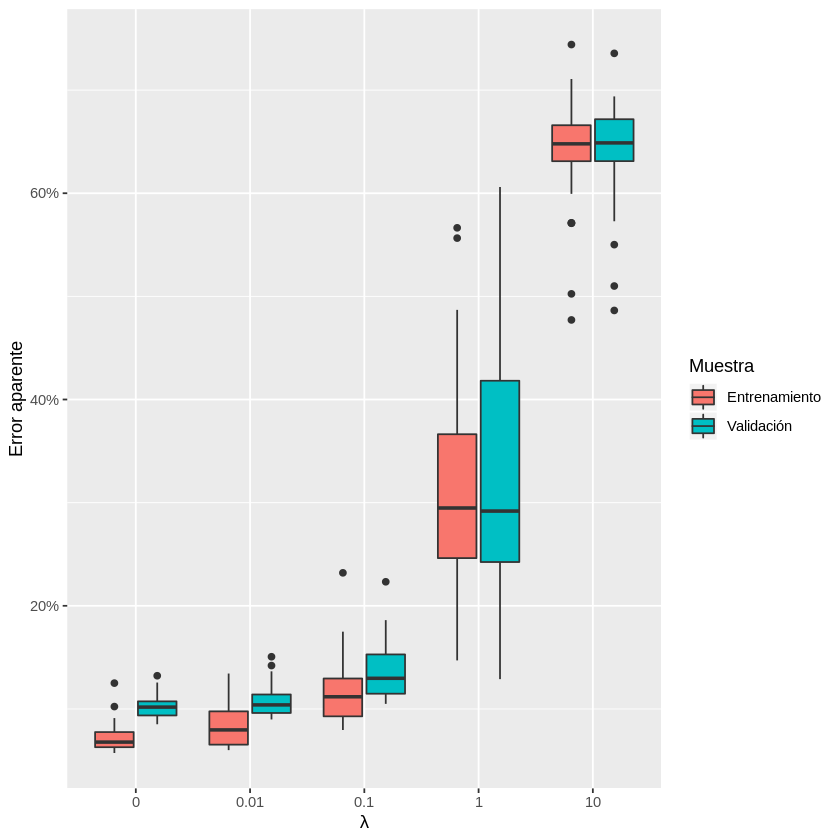

In [32]:
ggplot(data = selec_lambda,
       aes(x = factor(Reg_param),
           y = Err_aparente, 
           fill = Muestra)) +
geom_boxplot() +
scale_y_continuous(labels = scales::percent_format(1)) +
labs(x = expression(lambda),
     y = "Error aparente")

## Diseño seleccionado

In [0]:
#Cant. unidades de entrada:
unit_count <- ncol(x_train)

In [0]:
set.seed(123)

rna1 <- keras_model_sequential() 
rna1 %>% 
  layer_dense(units = 500, 
              activation = 'relu', 
              input_shape = c(unit_count)) %>% 
  layer_dense(units = 6, 
              activation = 'softmax')

rna1 %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_sgd(lr = 0.01),
  metrics = c('categorical_accuracy')
)

history1 <- rna1 %>% 
  fit(x = x_train, 
      y = y_train,
      validation_data = list(x_cv,y_cv))

In [35]:
# Precisión en la muestra de entrenamiento
rna1 %>% evaluate(x_train, y_train)

$loss
[1] 0.2274861

$categorical_accuracy
[1] 0.9086059

In [36]:
# Precisión en la muestra de validación
rna1 %>% evaluate(x_cv, y_cv)

$loss
[1] 0.3220362

$categorical_accuracy
[1] 0.885564

In [37]:
# Precisión en la muestra de test
rna1 %>% evaluate(x_test, y_test)

$loss
[1] 0.2895159

$categorical_accuracy
[1] 0.8961656